In [1]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import metrics

In [2]:
import pickle

In [3]:
# Lets read the datasets

churn = pd.read_csv(churn_data.csv)
customer = pd.read_csv(customer_data.csv)
internet = pd.read_csv(internet_data.csv)

##### Lets instpect the data

In [4]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
# Lets merge the datasets

merge = pd.merge(churn, customer, on= 'customerID')

In [8]:
data = pd.merge(merge, internet, on = "customerID")

In [9]:
# help(pd.merge)

In [10]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
data.shape

(7043, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [13]:
data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


##### Binary columns

In [14]:
y_n_cols = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [15]:
for x in y_n_cols:
    data[x] = data[x].apply(lambda y : 1 if y == "Yes" else 0)

In [16]:
data.gender = data.gender.apply(lambda x : 1 if x == 'Male' else 0)
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1,0,No phone service,DSL,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,0,0,No,DSL,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,0,0,No,DSL,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,0,0,No phone service,DSL,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,0,0,No,Fiber optic,0,0,0,0,0,0


In [18]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [19]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [20]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [21]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

##### Categorical Columns

In [22]:
cat_cols = ['Contract', 'PaymentMethod', 'MultipleLines', 'InternetService']

In [23]:
contract = pd.get_dummies(data.Contract, drop_first= True, prefix = "Contract")

In [24]:
for x in cat_cols:
    x = pd.get_dummies(data[x], drop_first= True, prefix = x)
    data = pd.concat([data, x], axis = 1)

In [25]:
data.shape

(7043, 30)

In [26]:
data.drop(cat_cols, inplace=True, axis = 1)

In [27]:
data.shape

(7043, 26)

In [28]:
data.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
MultipleLines_No phone service           0
MultipleLin

In [29]:
data.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,...,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,0.265370,0.504756,0.162147,0.483033,0.299588,0.286668,...,0.387903,0.209144,0.240664,0.216101,0.335794,0.228880,0.096834,0.421837,0.439585,0.216669
std,24.559481,0.295752,0.491457,30.090047,0.441561,0.500013,0.368612,0.499748,0.458110,0.452237,...,0.487307,0.406726,0.427517,0.411613,0.472301,0.420141,0.295752,0.493888,0.496372,0.412004
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# TotalCharges column was in object type, lets check what the problem is

data.TotalCharges.value_counts(dropna=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [31]:
data = data[~(data.TotalCharges == " ")]

In [32]:
data.TotalCharges = data.TotalCharges.astype('float')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   gender                                 7032 non-null   int64  
 8   SeniorCitizen                          7032 non-null   int64  
 9   Partner                                7032 non-null   int64  
 10  Dependents                             7032 non-null   int64  
 11  Onli

#### Preeprocessing (Splitting data into X and y)

In [34]:
data.drop("customerID", axis = 1, inplace= True)

In [35]:
y = data.Churn

In [36]:
X = data.drop("Churn", axis = 1)

In [37]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [38]:
X

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,...,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,34,1,0,56.95,1889.50,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,0,0,42.30,1840.75,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,1,0,1,1,1,...,1,1,0,0,0,1,0,1,0,0
7039,72,1,1,103.20,7362.90,0,0,1,1,0,...,1,1,0,1,0,0,0,1,1,0
7040,11,0,1,29.60,346.45,0,0,1,1,1,...,0,0,0,0,1,0,1,0,0,0
7041,4,1,1,74.40,306.60,1,1,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [39]:
data.shape

(7032, 25)

##### Splitting Train and Test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, test_size= .3, random_state= 100)

In [41]:
X_train.shape

(4922, 24)

In [42]:
X_test.shape

(2110, 24)

##### Scaling

In [43]:
# MinMaxScaling

num_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen']

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [46]:
X_train[num_cols]

,tenure,MonthlyCharges,SeniorCitizen
879,0.450704,0.362189,0.0
5790,0.549296,0.324378,0.0
6498,0.000000,0.637313,0.0
880,0.126761,0.913930,0.0
2784,0.042254,0.794527,0.0
...,...,...,...
79,0.619718,0.076119,0.0
3934,0.126761,0.218905,0.0
5964,0.676056,0.432836,0.0
6947,0.943662,0.823881,0.0


#### Correlation

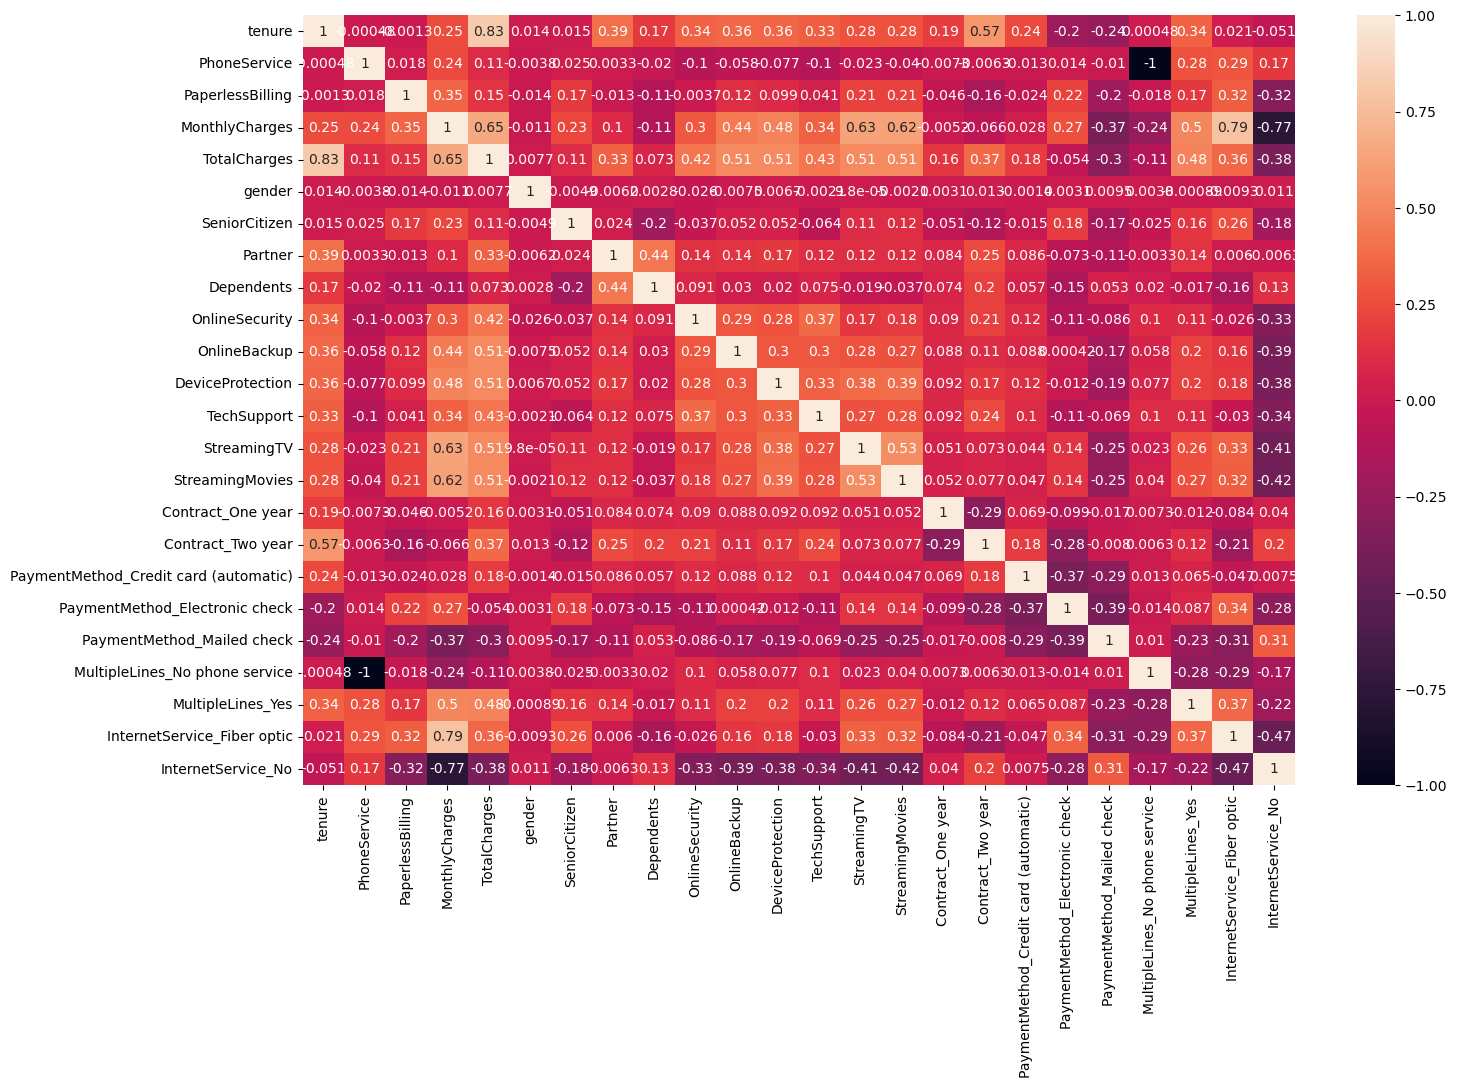

In [47]:
plt.figure(figsize= (16, 10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [48]:
X_train.drop("InternetService_No", axis = 1, inplace= True)

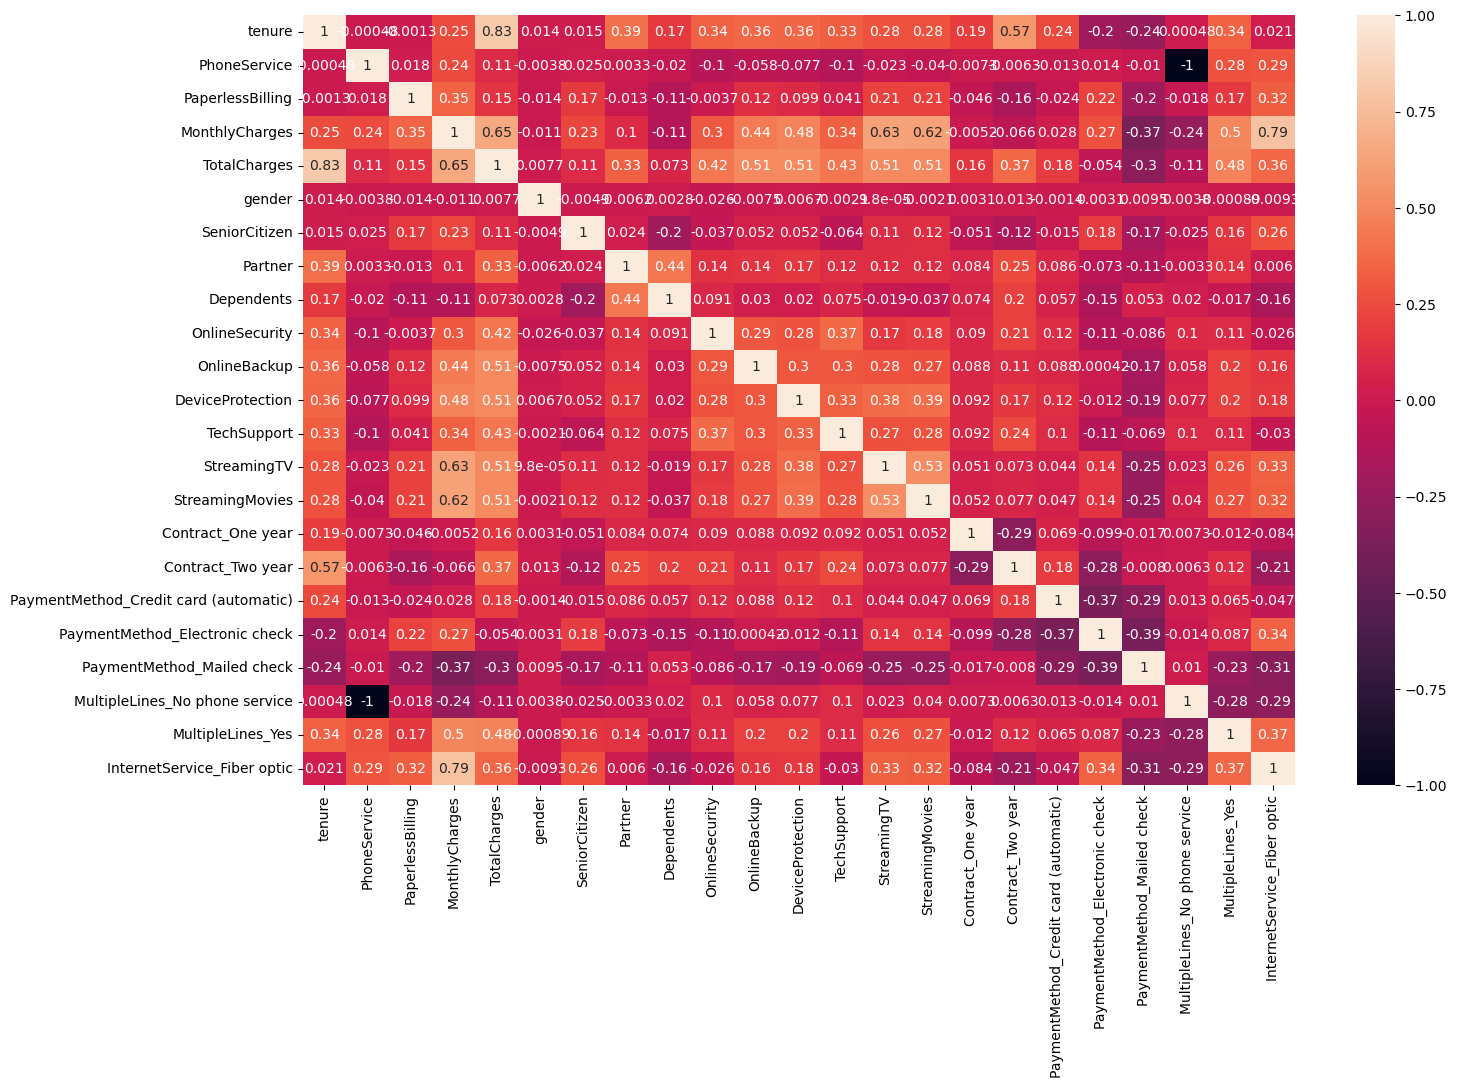

In [49]:
plt.figure(figsize= (16, 10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model 1

In [50]:
X_train_const = sm.add_constant(X_train)

In [51]:
model_0 = sm.GLM(y_train, X_train_const, family= sm.families.Binomial())
model_0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.7
Date:                Tue, 04 Apr 2023   Deviance:                       4017.4
Time:                        16:43:39   Pearson chi2:                 6.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2832
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4754      0.119     -4.008      0.000      -0.708      -0.243
tenure                                   -4.3085      0.543     -7.941      0.000      -5.372      -3.245
PhoneService                             -0.8500      0.102     -8.336      0.000      -1.050      -0.650
PaperlessBilling                          0.3354      0.090      3.730      0.000       0.159       0.512
MonthlyCharges                            3.5226      0.660      5.338      0.000       2.229       4.816
TotalCharges                              0.0003   8.63e-05      3.549      0.000       0.000       0.000
gender                                   -0.0355      0.078     -0.454      0.650      -0.189       0.118
SeniorCitizen                             0.3920      0.101      3.863      0.000       0.193       0.591
Partner                                   0.0461      0.094      0.492      0.622      -0.137       0.229
Dependents                               -0.1506      0.107     -1.405      0.160      -0.361       0.059
OnlineSecurity                           -0.5479      0.113     -4.859      0.000      -0.769      -0.327
OnlineBackup                             -0.3519      0.102     -3.456      0.001      -0.551      -0.152
DeviceProtection                         -0.2113      0.103     -2.046      0.041      -0.414      -0.009
TechSupport                              -0.5554      0.112     -4.946      0.000      -0.776      -0.335
StreamingTV                              -0.1072      0.121     -0.889      0.374      -0.343       0.129
StreamingMovies                          -0.2185      0.120     -1.816      0.069      -0.454       0.017
Contract_One year                        -0.6737      0.129     -5.237      0.000      -0.926      -0.422
Contract_Two year                        -1.2535      0.212     -5.917      0.000      -1.669      -0.838
PaymentMethod_Credit card (automatic)    -0.2572      0.137     -1.882      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1645      0.113      1.461      0.144      -0.056       0.385
PaymentMethod_Mailed check               -0.2556      0.137     -1.862      0.063      -0.525       0.013
MultipleLines_No phone service            0.3747      0.112      3.339      0.001       0.155       0.595
MultipleLines_Yes                         0.0315      0.103      0.307      0.759      -0.170       0.233
InternetService_Fiber optic              -0.1439      0.229     -0.629      0.529      -0.592       0.304
=========================================================================================================
"""

### RFE

In [52]:
log_model = LogisticRegression()

In [53]:
rfe = RFE(log_model, n_features_to_select=15)

In [54]:
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True])

In [56]:
# Selected columns by RFE

sel_cols = X_train.columns[rfe.support_]
sel_cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'InternetService_Fiber optic'],
      dtype='object')

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', False, 9),
 ('gender', False, 7),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 2),
 ('OnlineSecurity', True, 1),
 ('OnlineBackup', True, 1),
 ('DeviceProtection', False, 4),
 ('TechSupport', True, 1),
 ('StreamingTV', False, 5),
 ('StreamingMovies', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('MultipleLines_No phone service', True, 1),
 ('MultipleLines_Yes', False, 3),
 ('InternetService_Fiber optic', True, 1)]

In [58]:
X_train = X_train[sel_cols]

In [59]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'InternetService_Fiber optic'],
      dtype='object')

In [60]:
X_train.shape

(4922, 15)

### Model 2

In [61]:
X_train_const = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_const, family= sm.families.Binomial())
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.1
Date:                Tue, 04 Apr 2023   Deviance:                       4038.3
Time:                        16:43:40   Pearson chi2:                 5.28e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2802
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6572      0.097     -6.801      0.000      -0.847      -0.468
tenure                                   -2.5817      0.190    -13.553      0.000      -2.955      -2.208
PhoneService                             -0.8124      0.080    -10.139      0.000      -0.969      -0.655
PaperlessBilling                          0.3352      0.090      3.744      0.000       0.160       0.511
MonthlyCharges                            3.0092      0.356      8.450      0.000       2.311       3.707
SeniorCitizen                             0.4357      0.100      4.350      0.000       0.239       0.632
OnlineSecurity                           -0.4660      0.104     -4.476      0.000      -0.670      -0.262
OnlineBackup                             -0.2619      0.095     -2.763      0.006      -0.448      -0.076
TechSupport                              -0.4975      0.107     -4.635      0.000      -0.708      -0.287
Contract_One year                        -0.7237      0.126     -5.755      0.000      -0.970      -0.477
Contract_Two year                        -1.2915      0.207     -6.237      0.000      -1.697      -0.886
PaymentMethod_Credit card (automatic)    -0.2593      0.137     -1.898      0.058      -0.527       0.008
PaymentMethod_Electronic check            0.1822      0.112      1.620      0.105      -0.038       0.403
PaymentMethod_Mailed check               -0.2121      0.135     -1.569      0.117      -0.477       0.053
MultipleLines_No phone service            0.1552      0.097      1.599      0.110      -0.035       0.345
InternetService_Fiber optic               0.1746      0.165      1.056      0.291      -0.149       0.499
=========================================================================================================
"""

#### model 2

In [62]:
X_train.drop("InternetService_Fiber optic", axis = 1, inplace = True)

In [63]:
X_train_const = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.7
Date:                Tue, 04 Apr 2023   Deviance:                       4039.4
Time:                        16:43:40   Pearson chi2:                 5.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2800
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6791      0.095     -7.182      0.000      -0.864      -0.494
tenure                                   -2.5914      0.190    -13.613      0.000      -2.964      -2.218
PhoneService                             -0.8211      0.080    -10.276      0.000      -0.978      -0.664
PaperlessBilling                          0.3356      0.089      3.750      0.000       0.160       0.511
MonthlyCharges                            3.3114      0.214     15.495      0.000       2.893       3.730
SeniorCitizen                             0.4399      0.100      4.398      0.000       0.244       0.636
OnlineSecurity                           -0.4907      0.101     -4.843      0.000      -0.689      -0.292
OnlineBackup                             -0.2822      0.093     -3.042      0.002      -0.464      -0.100
TechSupport                              -0.5354      0.101     -5.296      0.000      -0.734      -0.337
Contract_One year                        -0.7364      0.125     -5.879      0.000      -0.982      -0.491
Contract_Two year                        -1.3019      0.207     -6.289      0.000      -1.708      -0.896
PaymentMethod_Credit card (automatic)    -0.2598      0.137     -1.902      0.057      -0.528       0.008
PaymentMethod_Electronic check            0.1824      0.112      1.623      0.105      -0.038       0.403
PaymentMethod_Mailed check               -0.2130      0.135     -1.576      0.115      -0.478       0.052
MultipleLines_No phone service            0.1420      0.096      1.474      0.141      -0.047       0.331
=========================================================================================================
"""

#### Model_3

In [64]:
X_train.drop("MultipleLines_No phone service", axis = 1, inplace = True)

In [65]:
X_train_const = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.7
Date:                Tue, 04 Apr 2023   Deviance:                       4039.4
Time:                        16:43:40   Pearson chi2:                 5.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2800
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5370      0.173     -3.097      0.002      -0.877      -0.197
tenure                                   -2.5914      0.190    -13.613      0.000      -2.964      -2.218
PhoneService                             -0.9631      0.150     -6.434      0.000      -1.257      -0.670
PaperlessBilling                          0.3356      0.089      3.750      0.000       0.160       0.511
MonthlyCharges                            3.3114      0.214     15.495      0.000       2.893       3.730
SeniorCitizen                             0.4399      0.100      4.398      0.000       0.244       0.636
OnlineSecurity                           -0.4907      0.101     -4.843      0.000      -0.689      -0.292
OnlineBackup                             -0.2822      0.093     -3.042      0.002      -0.464      -0.100
TechSupport                              -0.5354      0.101     -5.296      0.000      -0.734      -0.337
Contract_One year                        -0.7364      0.125     -5.879      0.000      -0.982      -0.491
Contract_Two year                        -1.3019      0.207     -6.289      0.000      -1.708      -0.896
PaymentMethod_Credit card (automatic)    -0.2598      0.137     -1.902      0.057      -0.528       0.008
PaymentMethod_Electronic check            0.1824      0.112      1.623      0.105      -0.038       0.403
PaymentMethod_Mailed check               -0.2130      0.135     -1.576      0.115      -0.478       0.052
=========================================================================================================
"""

#### Model 4

In [66]:
X_train.drop("PaymentMethod_Mailed check", axis = 1, inplace = True)
X_train_const = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.9
Date:                Tue, 04 Apr 2023   Deviance:                       4041.9
Time:                        16:43:40   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2796
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6814      0.148     -4.618      0.000      -0.971      -0.392
tenure                                   -2.5464      0.188    -13.540      0.000      -2.915      -2.178
PhoneService                             -0.9754      0.149     -6.525      0.000      -1.268      -0.682
PaperlessBilling                          0.3391      0.089      3.792      0.000       0.164       0.514
MonthlyCharges                            3.3713      0.211     15.990      0.000       2.958       3.784
SeniorCitizen                             0.4452      0.100      4.452      0.000       0.249       0.641
OnlineSecurity                           -0.4901      0.101     -4.838      0.000      -0.689      -0.292
OnlineBackup                             -0.2833      0.093     -3.054      0.002      -0.465      -0.102
TechSupport                              -0.5427      0.101     -5.373      0.000      -0.741      -0.345
Contract_One year                        -0.7365      0.125     -5.880      0.000      -0.982      -0.491
Contract_Two year                        -1.3047      0.207     -6.306      0.000      -1.710      -0.899
PaymentMethod_Credit card (automatic)    -0.1567      0.121     -1.300      0.194      -0.393       0.080
PaymentMethod_Electronic check            0.2874      0.091      3.152      0.002       0.109       0.466
=========================================================================================================
"""

#### Model 5

In [67]:
X_train.drop("PaymentMethod_Credit card (automatic)", axis = 1, inplace = True)
X_train_const = sm.add_constant(X_train)
model_5 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.8
Date:                Tue, 04 Apr 2023   Deviance:                       4043.6
Time:                        16:43:40   Pearson chi2:                 5.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2794
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7172      0.145     -4.944      0.000      -1.002      -0.433
tenure                            -2.5614      0.188    -13.644      0.000      -2.929      -2.193
PhoneService                      -0.9642      0.149     -6.464      0.000      -1.257      -0.672
PaperlessBilling                   0.3353      0.089      3.753      0.000       0.160       0.510
MonthlyCharges                     3.3448      0.210     15.954      0.000       2.934       3.756
SeniorCitizen                      0.4415      0.100      4.418      0.000       0.246       0.637
OnlineSecurity                    -0.4893      0.101     -4.831      0.000      -0.688      -0.291
OnlineBackup                      -0.2836      0.093     -3.058      0.002      -0.465      -0.102
TechSupport                       -0.5388      0.101     -5.340      0.000      -0.737      -0.341
Contract_One year                 -0.7388      0.125     -5.902      0.000      -0.984      -0.493
Contract_Two year                 -1.3093      0.207     -6.329      0.000      -1.715      -0.904
PaymentMethod_Electronic check     0.3364      0.083      4.043      0.000       0.173       0.499
==================================================================================================
"""

In [68]:
final_model = model_5.fit()

### Prediction on Train data set

In [69]:
y_train_pred = final_model.predict(X_train_const)

In [70]:
y_train

879     0
5790    0
6498    1
880     1
2784    1
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: Churn, Length: 4922, dtype: int64

In [71]:
y_train_pred

879     0.171837
5790    0.342741
6498    0.698132
880     0.601291
2784    0.660243
          ...   
79      0.031747
3934    0.086254
5964    0.047723
6947    0.116095
5649    0.058638
Length: 4922, dtype: float64

In [72]:
y_train_pred.values

array([0.17183692, 0.34274114, 0.69813232, ..., 0.04772279, 0.11609492,
       0.0586379 ])

In [73]:
pred_comparison = pd.DataFrame(y_train.values, y_train_pred.values)

In [74]:
pred_comparison = pred_comparison.reset_index()
pred_comparison.columns = ["Predicted_raw", "Actual"]
pred_comparison["Predicted"] = pred_comparison.Predicted_raw.apply(lambda x : 1 if x > 0.5 else 0)
pred_comparison

,Predicted_raw,Actual,Predicted
0,0.171837,0,0
1,0.342741,0,0
2,0.698132,1,1
3,0.601291,1,1
4,0.660243,1,1
...,...,...,...
4917,0.031747,0,0
4918,0.086254,0,0
4919,0.047723,0,0
4920,0.116095,0,0


In total we have 239 misclassified values

In [75]:
pred_comparison.Actual.sum() - pred_comparison.Predicted.sum()

239

#### Evaluation on Train data set

In [76]:
confusion_matrix(pred_comparison.Actual, pred_comparison.Predicted)

array([[3281,  354],
       [ 593,  694]], dtype=int64)

In [77]:
accuracy_score(pred_comparison.Actual, pred_comparison.Predicted)

0.8075985371800082

### Prediction on test data set

In [78]:
# Lets filter the columns selected by RFE and also drop the columns with high p values

X_test = X_test[sel_cols]

In [79]:
X_test.drop(["PaymentMethod_Credit card (automatic)", "PaymentMethod_Mailed check", "MultipleLines_No phone service", "InternetService_Fiber optic"], axis = 1, inplace = True)

In [80]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

#### Prediction

In [81]:
X_test_const = sm.add_constant(X_test)

In [82]:
y_test_pred_raw = final_model.predict(X_test_const)

In [83]:
y_test_pred = y_test_pred_raw.apply(lambda x : 1 if x > 0.5 else 0)
y_test_pred

942     0
3730    0
1761    0
2283    1
1872    0
       ..
1289    0
3508    0
6765    0
3598    1
4987    0
Length: 2110, dtype: int64

In [84]:
y_test

942     0
3730    1
1761    0
2283    1
1872    0
       ..
1289    0
3508    0
6765    0
3598    0
4987    0
Name: Churn, Length: 2110, dtype: int64

Only 97 misclassified values on unseen test data set

In [85]:
y_test.sum() - y_test_pred.sum()

97

#### Evaluation on Test Data set

In [86]:
confusion = confusion_matrix(y_test,y_test_pred)
confusion

array([[1362,  166],
       [ 263,  319]], dtype=int64)

In [87]:
accuracy_score(y_test_pred, y_test)

0.7966824644549763

We have good accuracy here also we have only 97 misclassified churn using this model

In [88]:
# Lets save the model
pickle.dump(final_model, open("Telecom_churn_final_model.pkl", 'wb'))

#### Other Evaluations
1. Sensitivity
2. Specificity

In [89]:
# help(confusion_matrix)
confusion

array([[1362,  166],
       [ 263,  319]], dtype=int64)

In [90]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [91]:
sensitivity = TP / (TP + FN)
sensitivity

0.5481099656357389

In [92]:
specificity = TN / (TN + FP)
specificity

0.8913612565445026

In [93]:
pred_comparison.to_excel('pred_comparison.xlsx')

In [94]:
fpr, tpr, threshold = metrics.roc_curve(pred_comparison.Actual, pred_comparison.Predicted_raw, drop_intermediate=False)

In [95]:
#help(metrics.roc_curve)

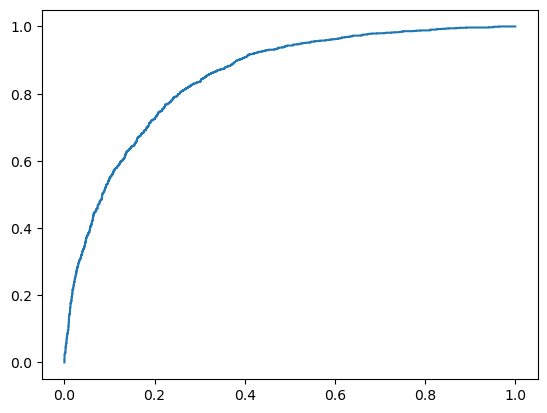

In [96]:
plt.plot(fpr, tpr )

In [97]:
auc_score = metrics.roc_auc_score(pred_comparison.Actual, pred_comparison.Predicted_raw)
auc_score

0.8486306296485114

In [98]:
pred_comparison

,Predicted_raw,Actual,Predicted
0,0.171837,0,0
1,0.342741,0,0
2,0.698132,1,1
3,0.601291,1,1
4,0.660243,1,1
...,...,...,...
4917,0.031747,0,0
4918,0.086254,0,0
4919,0.047723,0,0
4920,0.116095,0,0


In [99]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for x in thresholds:
    pred_comparison[x] = pred_comparison.Predicted_raw.apply(lambda a : 1 if a > x else 0)

In [100]:
pred_comparison

,Predicted_raw,Actual,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.171837,0,0,1,0,0,0,0,0,0,0,0
1,0.342741,0,0,1,1,1,0,0,0,0,0,0
2,0.698132,1,1,1,1,1,1,1,1,0,0,0
3,0.601291,1,1,1,1,1,1,1,1,0,0,0
4,0.660243,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.031747,0,0,0,0,0,0,0,0,0,0,0
4918,0.086254,0,0,0,0,0,0,0,0,0,0,0
4919,0.047723,0,0,0,0,0,0,0,0,0,0,0
4920,0.116095,0,0,1,0,0,0,0,0,0,0,0


In [134]:
sum(sum(confusion))

2110

In [140]:
cutoff_df = pd.DataFrame(columns=['x','accuracy','sensi','speci'])

for x in thresholds:
    cm = confusion_matrix(pred_comparison.Actual, pred_comparison[x])
    total = sum(sum(cm))
    accu = (cm[0,0] + cm[1,1]) / total
    sensi = cm[1,1] / (cm[1,1] + cm[1,0])
    speci = cm[0,0] / (cm[0,0] + cm[0,1])
    cutoff_df.loc[x] = [x, accu, sensi, speci]

In [141]:
cutoff_df

,x,accuracy,sensi,speci
0.1,0.1,0.614994,0.943279,0.498762
0.2,0.2,0.719423,0.864025,0.668226
0.3,0.3,0.773263,0.768454,0.774966
0.4,0.4,0.794596,0.644911,0.847593
0.5,0.5,0.807599,0.539239,0.902613
0.6,0.6,0.799472,0.383061,0.946905
0.7,0.7,0.779764,0.208236,0.982118
0.8,0.8,0.749289,0.050505,0.996699
0.9,0.9,0.738521,0.000000,1.000000


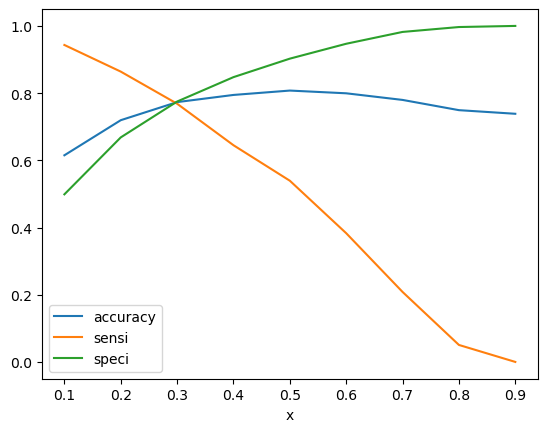

In [142]:
cutoff_df.plot.line(x = 'x', y = ['accuracy','sensi','speci'])
plt.show()

In [145]:
pred_comparison['Final_predicted'] = pred_comparison.Predicted_raw.apply(lambda x : 1 if x > 0.3 else 0)

In [148]:
print(pred_comparison.Actual.sum())
print(pred_comparison.Final_predicted.sum())

1287
1807


In [149]:
pred_comparison.Actual.sum() - pred_comparison.Final_predicted.sum()

-520

We might be giving additional offers 520 customers who will not be churning

but the good thing is we will be convering almost every customer even with 1% of churning rate